Python Project Niccolò Zoboli 


Project 3: RANDOM ASSIGNMENT PROBLEM

The random assignment problem consists of allocating n jobs to an equal number of machines to minimize a random total cost. We aim to estimate the expected cost value associated with the optimal solution.

**Objectives:** Minimize the total cost \( A_n \) for a given \( n \times n \) cost matrix \( C \) where the entries are independent and identically distributed random variables following a uniform distribution \( U(0, 1) \). Additionally, estimate the expected cost value \( E(A_n) \) as \( n \) becomes large.

In [10]:
import numpy as np
import matplotlib.pyplot as plt


Step 1)

Create the cost matrix 

In the first part I have to create a function that create a matrix " size x size ", where each element is a Random Variables distributed between 0 and 1.
All this parts is structured to simulate the randoms costs associated with assigning jobs to the machine. 

In [11]:
# Function to generate a random cost matrix
def create_cost_matrix(size):
    return np.random.uniform(0, 1, (size, size))         #Random values between 0 and 1 

Step 2)

Total cost 

This function calculates the total cost of a given permutation of jobs to machines.
In the second part, it iterates through each job (row in the cost matrix) and sums the cost of assigning job i to machine permutation [i].

In [12]:
# Function to calculate the total cost given a cost matrix and a permutation
def calculate_total_cost(cost_matrix, permutation):
    total_cost = 0
    for i in range(len(cost_matrix)):
        total_cost += cost_matrix[i, permutation[i]]
    return total_cost


In this case it is appropriate to implement the Metropolis - Hastings algorithm both with history and without history. This is because thanks to history we can track and visualize the evolution of the cost, while without history we can do the final cost estimation and analysis.

Step 3)

Implementation with history

This function implements this algorithm to find an optimal job-machine assignment.
Structure: 

- n is the length of the initial permutation.
- perm_history and cost_history store the history of permutations and their corresponding costs.

Iteration Part : 

- For each iteration, a new random permutation is generated.
- The cost of this new permutation is calculated.
- The acceptance probability is computed using the Metropolis-Hastings criterion.
- If the new permutation is accepted (based on the acceptance probability), it is added to the history; otherwise, the previous permutation is   retained.
- The function returns the history of permutations and costs.

In [25]:
# Function that implements the Metropolis-Hastings algorithm
def metropolis_hastings_algorithm(cost_matrix, beta, initial_perm, iterations):
    n = len(initial_perm)   # Get the number of elements in the permutation
    perm_history = [initial_perm.copy()]  # Start the list of permutations with the initial one
    cost_history = [calculate_total_cost(cost_matrix, initial_perm)]# Start the list of costs with the cost of the initial permutation
    
    
    for t in range(1, iterations):                                #iterations of values 
        new_perm = np.random.permutation(n)      # Generate a new random permutation
        new_cost = calculate_total_cost(cost_matrix, new_perm)      # Compute the cost of the new permutation
        acceptance_prob = np.exp(beta * (cost_history[t-1] - new_cost)) # Calculate the acceptance probability using the Metropolis-Hastings criterion
        if np.random.uniform(0, 1) < min(1, acceptance_prob):
            perm_history.append(new_perm)# If accepted, add the new permutation and cost to the lists
            cost_history.append(new_cost)
        else:
            perm_history.append(perm_history[t-1])  # If accepted, add the new permutation and cost to the lists
            cost_history.append(cost_history[t-1])
    return perm_history, cost_history                  

STEP 4)

SIMULATIONS WITH DIFFERENT MATRIX AND RESULT.

Simulations with different matrix size 

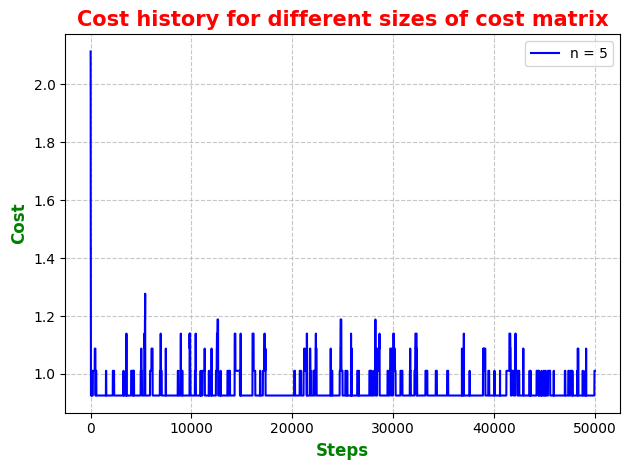

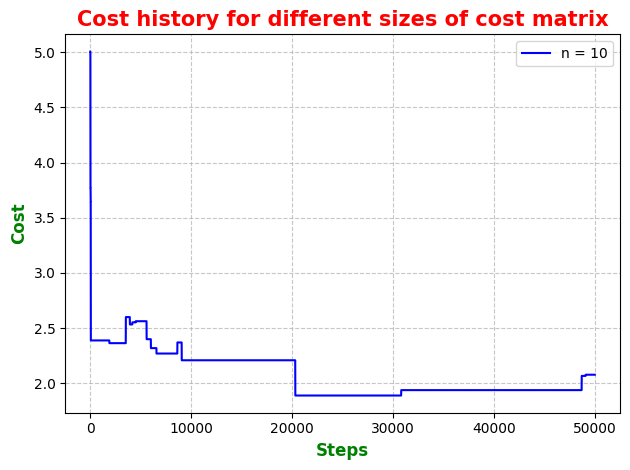

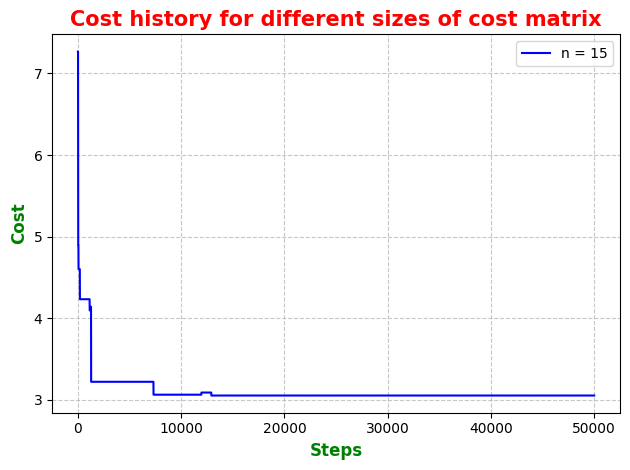

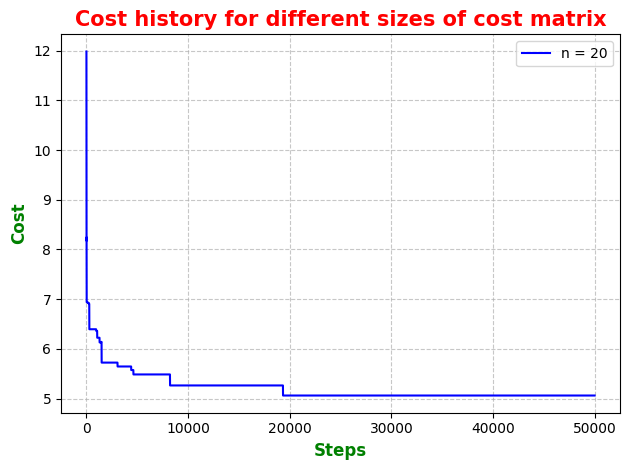

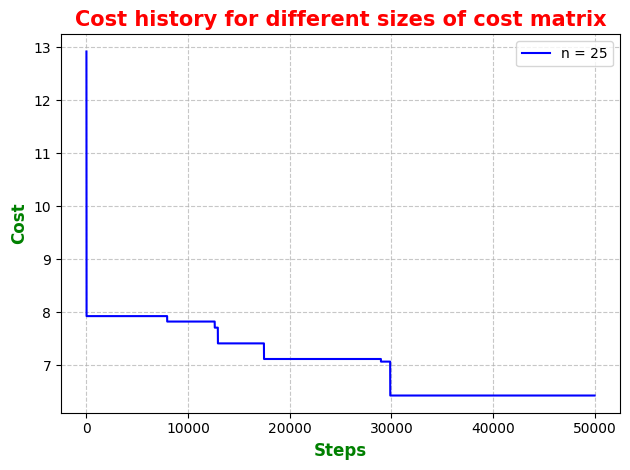

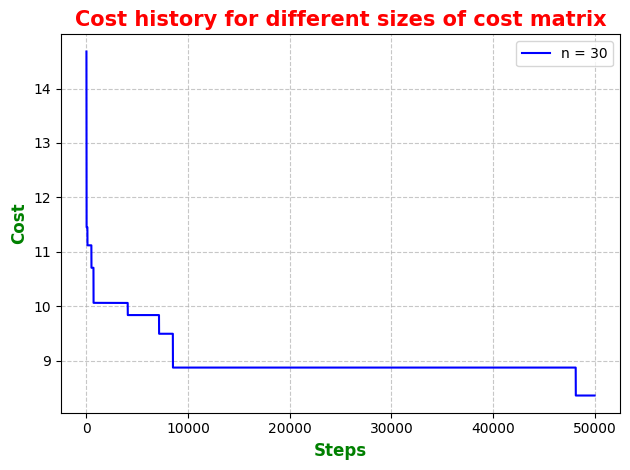

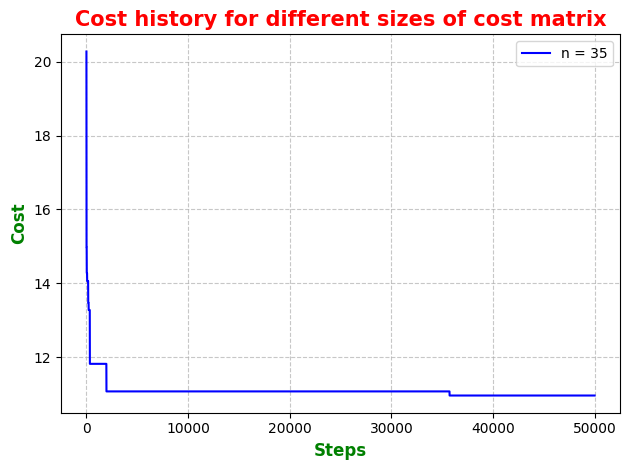

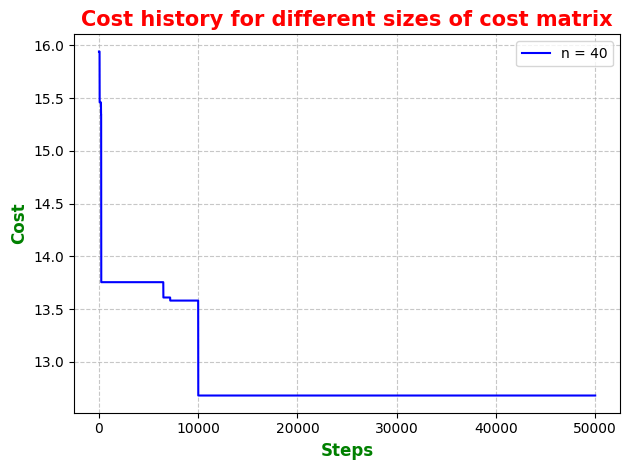

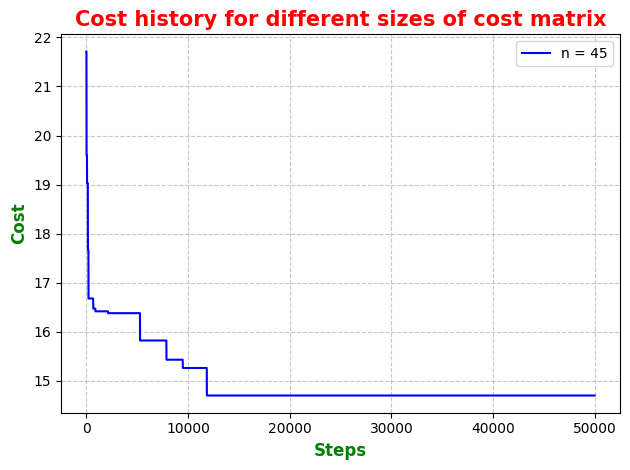

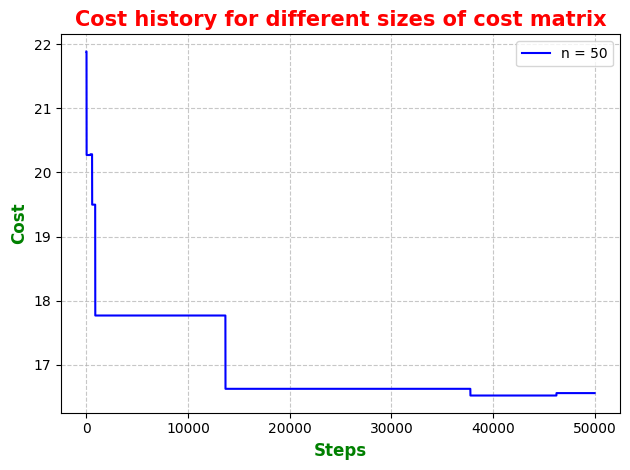

In [30]:
ns = [5 * alpha for alpha in range(1, 11)]
beta = 20 #beta parameter for the Metropolis - Hastings algorithm
steps = 50000 #number of steps for each Metropolis - Hastings simulation

for n in ns:
    matrix = create_cost_matrix(n) #generate a cost matrix of size n
    initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
    _, costs = metropolis_hastings_algorithm(matrix, beta, initial_permutation, steps) #run the Metropolis - Hastings algorithm and obtain the cost history
    
    plt.plot(range(steps), costs, label=f'n = {n}', color = 'blue')
    plt.title('Cost history for different sizes of cost matrix', fontweight = 'bold', color = 'red', fontsize = 15) 
    plt.xlabel('Steps', fontweight = 'bold', color = 'green', fontsize = 12) 
    plt.ylabel('Cost', fontweight = 'bold', color = 'green', fontsize = 12) 
    plt.grid(True, linestyle = '--', alpha = 0.7)
    plt.legend() 
    plt.tight_layout()
    plt.show()

When n increase, the cost tend to stabilize and flatten out 

Step 5)

 Algorithm without history 

 Implement the Metropolis-Hastings algorithm such that it only keeps track of the final permutation and its corresponding cost, rather than maintaining a history of all permutations and costs.

In [29]:
# Metropolis-Hastings algorithm implementation
def mh_algorithm(cost_matrix, beta_value, start_perm, num_steps):
    n = len(start_perm)
    current_perm = start_perm.copy()
    current_cost = calculate_total_cost(cost_matrix, start_perm)
    
    for step in range(num_steps):
        proposed_perm = np.random.permutation(n)
        proposed_cost = calculate_total_cost(cost_matrix, proposed_perm)
        acceptance_ratio = np.exp(beta_value * (current_cost - proposed_cost))
        
        if np.random.uniform() < min(1, acceptance_ratio):
            current_perm = proposed_perm
            current_cost = proposed_cost
    
    return current_perm, current_cost

Step 6: estimate E(An) for different sizes of n

Run the Metropolis - Hastings algorithm for different sizes of n and estimate E(An).

In [15]:
# Parameters and initializations
dimension_range = [5 * alpha for alpha in range(1, 11)]
beta_value = 20                #positive parameter for algorithm
num_steps = 500000            #n of steps 
num_realizations = 100        #n of independendt realizations 

# Estimating costs
mean_costs = []     #List to store the estimated costs for each matrix size

for dim in dimension_range:
    cost_samples = []
    
    for _ in range(num_realizations):       #Perform M independent realizations for each matrix size
        cost_matrix = create_cost_matrix(dim)       #Generate a cost matrix of size n
        initial_perm = np.random.permutation(dim)   #Generate a random initial permutation of indices from 0 to n - 1
        _, final_cost = mh_algorithm(cost_matrix, beta_value, initial_perm, num_steps)#Run the Metropolis-Hastings algorithm and obtain the best permutation and its cost
        cost_samples.append(final_cost) #Store the cost obtained from the Metropolis-Hastings algorithm
    
    mean_costs.append(np.mean(cost_samples))#Calculate the average cost across all realizations for the current matrix size




Step 7) 

Plotting the result E(An) for different size of n. 

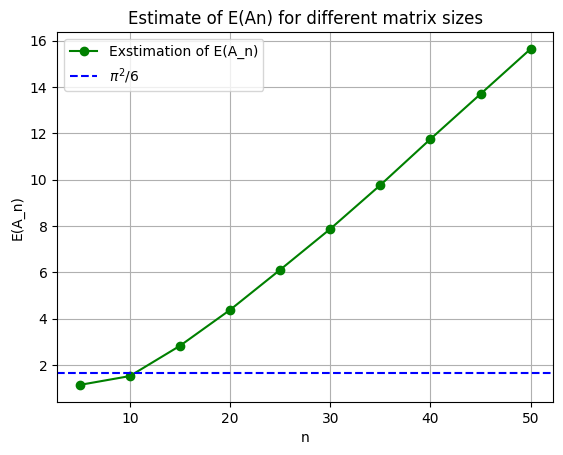

In [21]:
plt.plot(dimension_range, mean_costs, marker='o', linestyle='-', color='g', label='Exstimation of E(A_n)')
plt.axhline(y=np.pi**2/6, color='b', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimate of E(An) for different matrix sizes')
plt.legend()
plt.grid(True)
plt.show()

The graphs show that there is not convergence excpet within n = 10. 
The program generally works well, but there are issues with the dimension \( n \).
For \( n \) greater than 10, the Metropolis-Hastings algorithm needs an extremely high number of iterations to find the minimum, making the process impractical.
To improve efficiency, limit the analysis to dimensions \{5,6,7,8,9\}. We need to choose a beta value between 10 and 20 and run the algorithm for at least 500,000 steps. This approach, though requiring patience, will show that the estimate approaches \(pi^2/6\) from below.

/var/folders/nj/2z9y9nzj7l3b5rjdxw2r9cmw0000gn/T/ipykernel_72366/159546357.py:11: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(beta * (cost_history[t-1] - new_cost)) # Calculate the acceptance probability using the Metropolis-Hastings criterion


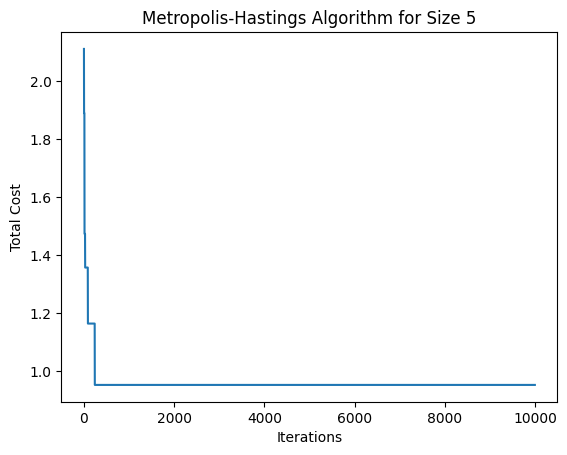

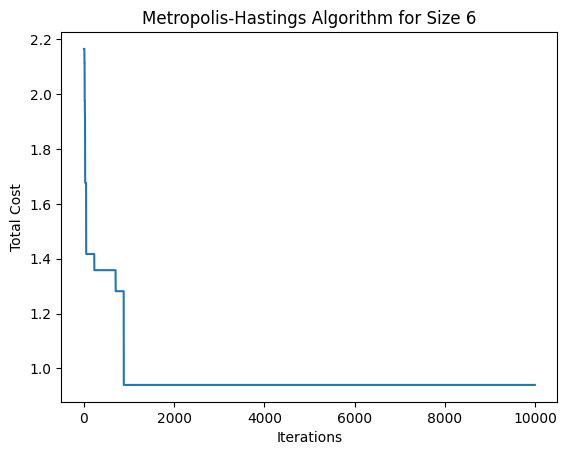

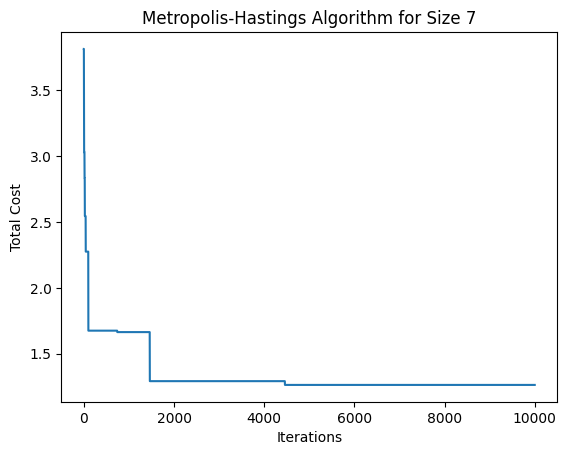

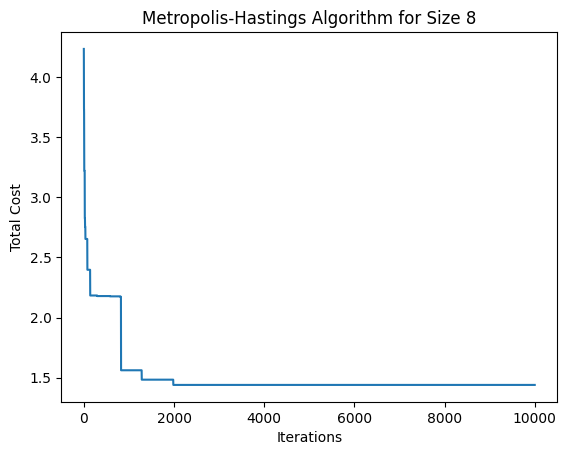

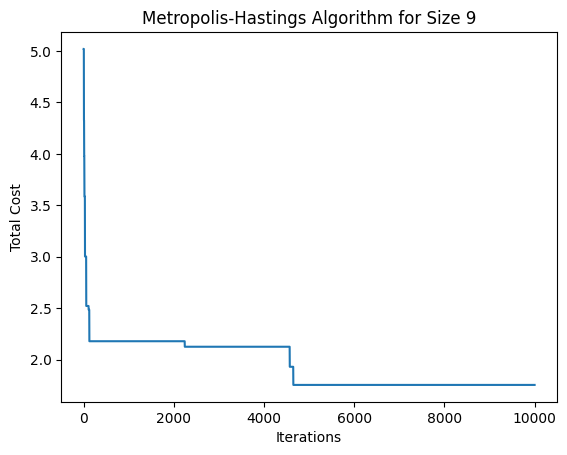

In [17]:
# Example usage of the functions
sizes = range(5, 10)                    #different dimension for matrix cost 
for size in sizes:
    iterations = 10000                  #n of iterations 
    beta = 10000
    cost_matrix = create_cost_matrix(size)
    initial_perm = np.random.permutation(size)              #initial permutation 
    _, costs = metropolis_hastings_algorithm(cost_matrix, beta, initial_perm, iterations)
    
    #plotting 
    plt.plot(range(iterations), costs)
    plt.xlabel('Iterations')
    plt.ylabel('Total Cost')
    plt.title(f'Metropolis-Hastings Algorithm for Size {size}')
    plt.show()


In [32]:
ns = range(5, 10)           #size for cost matrix
beta = 20  #paramether for Metropolis - Hastings algorithm 
steps = 50000               #n of steps 
M = 100   #n of independent relations 

estimated_costs = []            #where I store estimated cost for each matrix size 
for n in ns:
    costs = []
    for _ in range(M):                      
        matrix = create_cost_matrix(n)      # Generate a cost matrix of size n
        initial_permutation = np.random.permutation(n) # Create a random initial permutation of indices from 0 to n-1         
        _, cost = mh_algorithm(matrix, beta, initial_permutation, steps)# Run the Metropolis-Hastings algorithm to get the optimal permutation and its cost
        costs.append(cost)      # Store the cost obtained from the Metropolis-Hastings algorithm
    estimated_costs.append(np.mean(costs))      # Compute the average cost across all realizations for the current matrix size




Plotting 

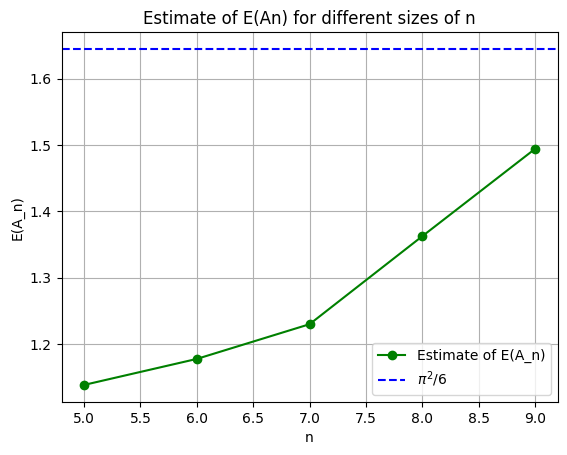

In [33]:

# plotting of results 
plt.plot(ns, estimated_costs, marker='o', linestyle='-', color='g', label='Estimate of E(A_n)')
plt.axhline(y=np.pi**2/6, color='b', linestyle='--', label=r'$\pi^2 / 6$')
plt.xlabel('n')
plt.ylabel('E(A_n)')
plt.title('Estimate of E(An) for different sizes of n')
plt.legend()
plt.grid(True)
plt.show()